# Preprocessing & Exploring

In this notebook, we will load and examine the data set. We will clean and format the data so that it can be used for regression analysis. We  will also perform a short exploration of the potential correlations within the data. 

***
## Preprocessing the Data

First, we will load the data set from the .csv file and take a look at type of information included in the data.

In [1]:
# import library
import pandas as pd

In [2]:
# import data set
amzn_data = pd.read_csv("AMZN-10Yr-Quotes.csv")

In [3]:
# view default data types & check for null (missing) values
amzn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


There are no null values, so we will use the entire data set. 

In [4]:
# confirm column (attribute) name strings
amzn_data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [5]:
# since these strings have unnecessary spaces, we will rename them
amzn_data.rename(columns={' Open': 'Open', ' Close/Last':"Close", ' Volume': "Volume",
                          ' High': "High", ' Low':"Low"}, inplace=True)

In [6]:
# view some rows to see what the data points look like
amzn_data.head()

,Date,Close,Volume,Open,High,Low
0,06/26/2020,$2692.87,6500784,$2775.056,$2782.5688,$2688
1,06/25/2020,$2754.58,2968657,$2739.55,$2756.23,$2712.14
2,06/24/2020,$2734.4,4526605,$2780,$2796,$2721
3,06/23/2020,$2764.41,4231707,$2726.02,$2783.11,$2718.04
4,06/22/2020,$2713.82,3208780,$2684.5,$2715,$2669


### After an initial look at the data, we need to:
- Convert 'Date' string objects to datetime objects
- Convert remaining attributes' string objects to numerical values

### Explanation:
The snippet of rows above shows that all columns except the 'Date' column contain integers or floating point numbers. However, the data types we viewed earlier did not reflect this. Therefore, we need to convert those data points from string objects to numerical values. 

For the 'Date' values, we can re-load the data set using the parse_dates parameter included with pd.read_csv to load them as datetime objects. Converting each attribute's values to the correct format is necessary to perform our linear regression analysis.

#### Convert 'Date' values to datetime objects.

In [7]:
# re-load data set with datetime objects for 'Date' values
amzn_data = pd.read_csv("AMZN-10Yr-Quotes.csv", parse_dates=['Date'])

In [8]:
# confirm that 'Date' column has changed to datetime objects
amzn_data.dtypes

Date           datetime64[ns]
 Close/Last            object
 Volume                 int64
 Open                  object
 High                  object
 Low                   object
dtype: object

#### Convert remaining columns to numerical values.

In [9]:
# rename the columns again, since we re-loaded the data
amzn_data.rename(columns={' Open': 'Open', ' Close/Last':"Close", ' Volume': "Volume",
                          ' High': "High", ' Low':"Low"}, inplace=True)

In [10]:
# view string from a single value in 'Open' column
amzn_data['Open'].loc[0]

' $2775.056'

Here we can see that there is an unnecessary space as well as a $ symbol in the string. Those will need to be removed in order to convert these data points to floating point numbers.

In [11]:
# remove the initial space and $ symbol 
# then, convert the processed strings into float values
amzn_data['Open'] = amzn_data['Open'].replace(' \$', '', regex=True).astype(float)
amzn_data['Close'] = amzn_data['Close'].replace(' \$', '', regex=True).astype(float)
amzn_data['High'] = amzn_data['High'].replace(' \$', '', regex=True).astype(float)
amzn_data['Low'] = amzn_data['Low'].replace(' \$', '', regex=True).astype(float)

In [12]:
# check that those columns are now floating point numbers
amzn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Close   2518 non-null   float64       
 2   Volume  2518 non-null   int64         
 3   Open    2518 non-null   float64       
 4   High    2518 non-null   float64       
 5   Low     2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


In [13]:
amzn_data.head()

,Date,Close,Volume,Open,High,Low
0,2020-06-26,2692.87,6500784,2775.056,2782.5688,2688.00
1,2020-06-25,2754.58,2968657,2739.550,2756.2300,2712.14
2,2020-06-24,2734.40,4526605,2780.000,2796.0000,2721.00
3,2020-06-23,2764.41,4231707,2726.020,2783.1100,2718.04
4,2020-06-22,2713.82,3208780,2684.500,2715.0000,2669.00


#### Preprocessing is complete.
Since the initial processing of the data set is finished, we can take a look at the possible relationships present in the data set.

***
## Exploring the Data

We will perform a short exploration of the data set to check for potential trends. We will first plot the stock price attributes over the included time period. 

In [14]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
# suppress scientific notation by limiting decimal places
pd.options.display.float_format = '{:,.2f}'.format 
# print out general stats about data
amzn_data.describe()

,Close,Volume,Open,High,Low
count,"2,518.00","2,518.00","2,518.00","2,518.00","2,518.00"
mean,775.45,"4,356,203.75",775.41,783.26,766.74
std,652.08,"2,535,317.06",652.07,658.76,644.73
min,108.61,"881,337.00",105.92,111.29,105.80
25%,257.29,"2,768,475.00",257.08,259.50,254.32
50%,437.55,"3,722,615.00",437.53,439.87,433.92
75%,"1,187.06","5,138,635.00","1,188.83","1,192.48","1,178.36"
max,"2,764.41","42,394,400.00","2,780.00","2,796.00","2,721.00"


#### Plot stock prices and dates to view relationship between them.

Text(0.5, 1.0, 'AMZN Stock Prices from 2010 to 2020')

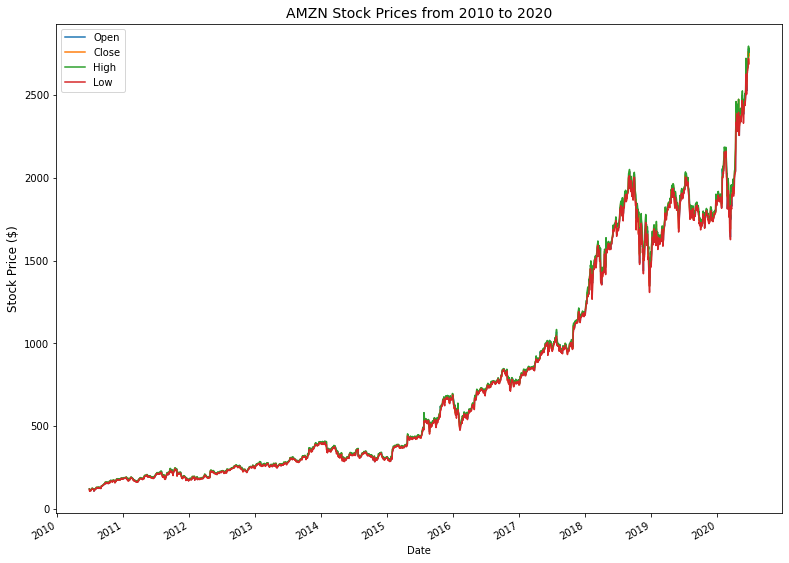

In [16]:
# plot daily price quotes over the time period
ax = amzn_data.plot(x='Date', y=['Open', 'Close', 'High', 'Low'], figsize=(13,10))
ax.set_ylabel("Stock Price ($)", fontsize=12)
ax.set_title("AMZN Stock Prices from 2010 to 2020", fontsize=14)

This plot shows a strong correlation between the price and time. Despite a few dips, it is showing a continual increase over the 10 year period. Therefore, we will utilize these attributes in the linear regression analysis in the next notebook.

#### Plot pairwise relationships between attributes.

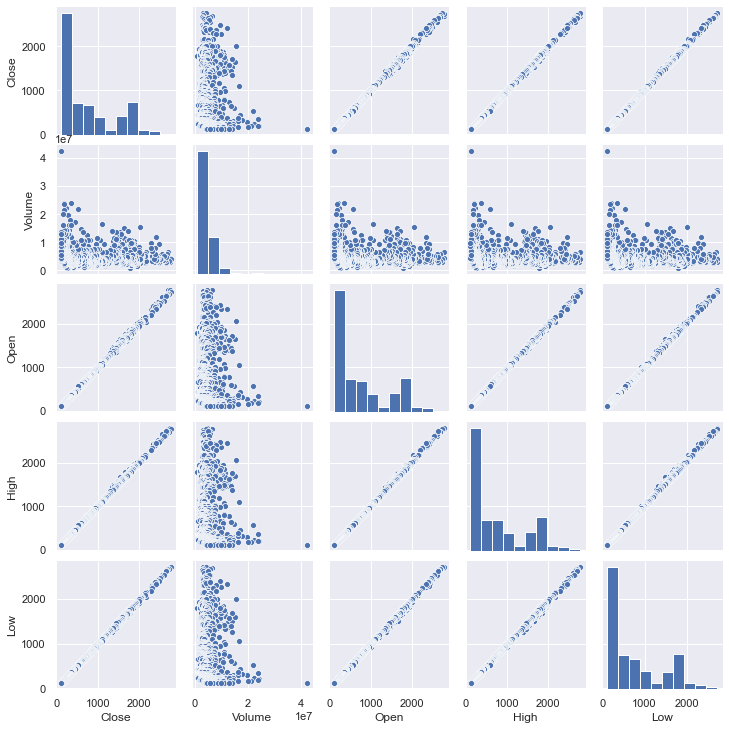

In [17]:
# use Seaborn to view plots between each pair of numerical attributes
sns.set(color_codes=True) #set default colors and formatting
sns.pairplot(amzn_data, height=2)

The diagonal line of histograms shows the distributions of each attribute in the data set. The scatter plots display the relationship between two different attributes.

The stock price attributes all show strong positive correlations with each other, but they are likely to be similar since this stock does not jump up and down dramatically. 

We will focus on 'Volume' here. These plots show that 'Volume' is not strongly correlated with the daily price quotes. As the trading volume increases, the price does not seem to increase, but rather, is stacked one on top of the other. This is likely due to the fact that the price has increased over time, however, daily trading volume has not. Therefore, we will not be using 'Volume' in our regression analysis.

In [18]:
# drop the 'Volume' column
amzn_data.drop('Volume', axis=1, inplace=True)

In [19]:
amzn_data.head()

,Date,Close,Open,High,Low
0,2020-06-26,"2,692.87","2,775.06","2,782.57","2,688.00"
1,2020-06-25,"2,754.58","2,739.55","2,756.23","2,712.14"
2,2020-06-24,"2,734.40","2,780.00","2,796.00","2,721.00"
3,2020-06-23,"2,764.41","2,726.02","2,783.11","2,718.04"
4,2020-06-22,"2,713.82","2,684.50","2,715.00","2,669.00"


The data set has now been processed and is ready for analysis. We will export this data set into a new .csv file. The data set includes numerical values (which are necessary to perform linear regression) along with datetime objects.

In [20]:
# export dataframe to a .csv file
amzn_data.to_csv('AMZN-10Yr-Quotes-Processed.csv', index=False)